In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import time

## change in velocity
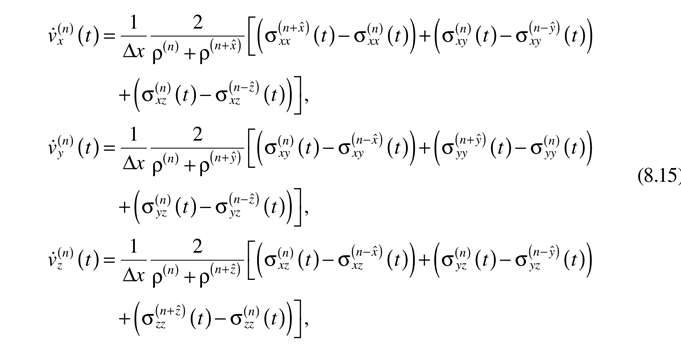

## change in stress
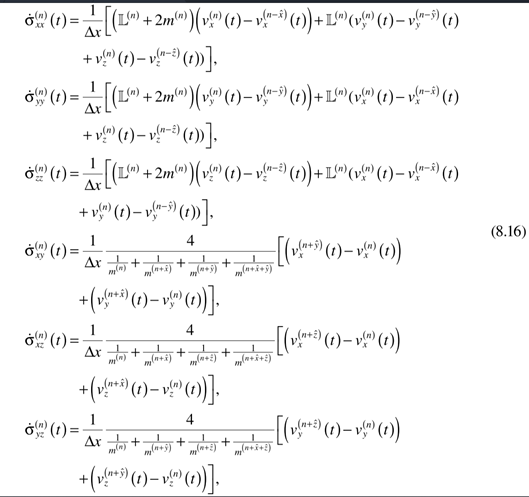

## update rules
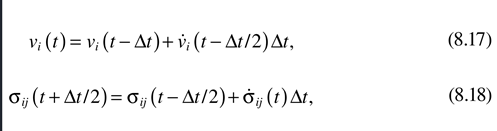

## Boundary Conditions
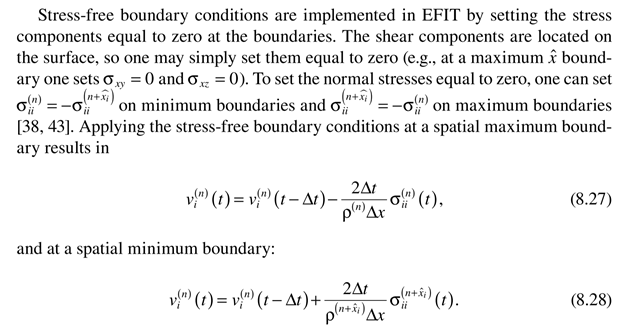

## Stability Conditions
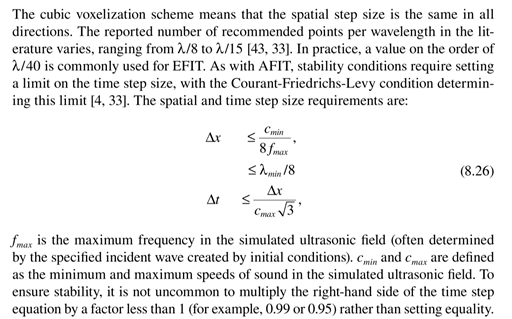

## General Procedure 

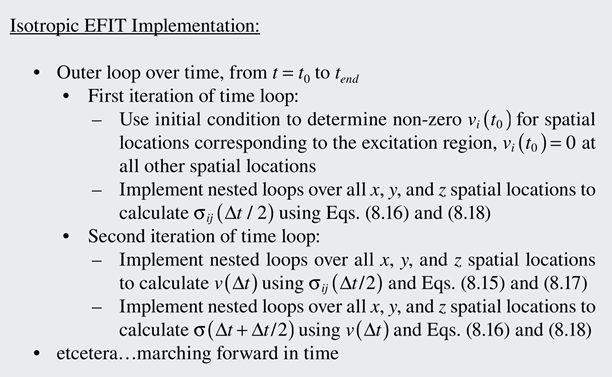

In [3]:
# set Constants

print('---------- MATERIAL PROPERTIES ----------')

#MATERIAL 1
mat1='silicon'
pRatio1 = 0.27                                     #poission's ratio 
yModulus1 = 62 * (10**9)                           #youngs modulus in pascals
rho1 = 2330                                        #density in kg/m^3

mu1 = yModulus1/(2*(1+pRatio1))                    #second Lame Parameter
lmbda1 = 2 * mu1 * pRatio1 / (1 - 2 * pRatio1)     #first Lame Parameter

print('material 1:',mat1,'- PR=',pRatio1,'- YM=',yModulus1,'- density=',rho1,'- lame 1=',lmbda1,'- lame2=',mu1)


#Calculate speed of longitudinal and transverse waves in material 1
cl1 = np.sqrt((lmbda1 + 2* mu1)/rho1)
ct1 = np.sqrt(mu1/rho1)


#MATERIAL 2
mat2='glass'
pRatio2=.33
yModulus2= 90*(10**9)
rho2 = 5200
mu2 = yModulus2/(2*(1+pRatio2))                    
lmbda2 = 2 * mu2 * pRatio2 / (1 - 2 * pRatio2)     

print('material 2:',mat2,'- PR=',pRatio2,'- YM=',yModulus2,'- density=',rho2,'- lame 1=',lmbda2,'- lame2=',mu2)
print('\n')

#Calculate speed of longitudinal and transverse waves in material 2
cl2= np.sqrt((lmbda2 + 2* mu2)/rho2)
ct2 = np.sqrt(mu2/rho2)

print('---------- WAVE SPEEDS (M/S) ----------')
print('-----                   Longitudinal   |  Transverse ')
print('material 1 wave speeds:' ,cl1,ct1)
print('material 2 wave speeds:' ,cl2,ct2)
print('\n')


#dimensions of materials in meters
#the dimensions of material 1 should be greater than material 2

#dimensions of material 1 
length1 = 0.75
width1 = 0.75
height1 = 0.1


#dimensions for material 2
length2= 0.05
width2= 0.05
height2= 0.08



---------- MATERIAL PROPERTIES ----------
material 1: silicon - PR= 0.27 - YM= 62000000000 - density= 2330 - lame 1= 28654570352.61897 - lame2= 24409448818.897636
material 2: glass - PR= 0.33 - YM= 90000000000 - density= 5200 - lame 1= 65678903140.20346 - lame2= 33834586466.165413


---------- WAVE SPEEDS (M/S) ----------
-----                   Longitudinal   |  Transverse 
material 1 wave speeds: 5766.317321005645 3236.689402981444
material 2 wave speeds: 5063.976775537154 2550.8138394428843




In [49]:
#brass
rho1=8400
cl1=4400
ct1=2200

#aluminum
rho2=2761
cl2=6363
ct2=3161

In [55]:
#Choose ferquency to be used for excitment
frequency = 20000

#Run for n Cycles:
n=6
runtime = n / frequency 

#runtime = 8e-5

#Set time step and grid step to satisfy courant conditions


#calculate wave lengths for material 1
omegaL1 = cl1 / frequency
omegaT1 = ct1 / frequency

#calculate wavelengths in material 2
omegaL2 = cl2 / frequency
omegaT2 = ct2 / frequency

gs = (min(omegaL1, omegaT1,omegaL2,omegaT2) /20)    #grid step
ts = gs/((max(cl1,ct1,cl2,ct2))*(np.sqrt(3)))*0.95  #time step

Tsteps = int(math.ceil(runtime / ts)) + 1       #total Time Steps

#number of grid points
gl1 = int(math.ceil(length1 / gs))       #length 
gw1 = int(math.ceil(width1 / gs))        #width
gh1 = int(math.ceil(height1 / gs))       #height


#print(runtime, ts, gs, Tsteps, gl, gh)
print('---------- RUNTIME INFORMATION ----------')
print('Running for',n,'cyles with',frequency,'input frequency')
print('Total runtime (s)=',runtime,'- time step (s)=',ts,'- # of time steps=',Tsteps)
print('\n')

print('---------- GRID DIMENSIONS ----------')
print('length, width, height (m):', [length1,width1,height1])
print('grid step size (m), # of length pts, # of height pts, # of width pts:', [gs, gl1, gw1,gh1])
print('\n')

---------- RUNTIME INFORMATION ----------
Running for 6 cyles with 20000 input frequency
Total runtime (s)= 0.0003 - time step (s)= 4.74093219631588e-07 - # of time steps= 634


---------- GRID DIMENSIONS ----------
length, width, height (m): [0.75, 0.75, 0.1]
grid step size (m), # of length pts, # of height pts, # of width pts: [0.0055, 137, 137, 19]




In [56]:
# Functions to define the geometry of the material properties

def rectangleCylinder(matProps, length2, width2, height2, gl1,gw2,gh2,gs,rho2,lmbda2,mu2):
    #defines a rectangular cylinder at the center of the simulation grid
    
    gl2 = int(math.ceil(length2 / gs))       
    gw2 = int(math.ceil(width2 / gs))         
    gh2 = int(math.ceil(height2 / gs))

    matProps[0,int(gl1/2)-gl2:int(gl1/2)+gl2,int(gw1/2)-gw2:int(gw1/2)+gw2,0:gh1]=rho2
    matProps[1,int(gl1/2)-gl2:int(gl1/2)+gl2,int(gw1/2)-gw2:int(gw1/2)+gw2,0:gh1]=lmbda2
    matProps[2,int(gl1/2)-gl2:int(gl1/2)+gl2,int(gw1/2)-gw2:int(gw1/2)+gw2,0:gh1]=mu2
    
    return matProps


def angledWedge(matProps, length2,width2,height2, gl1,gw1,gs,rho2,lmbda2,mu2):
    #defines a material space where the block is made up of two wedges of material 1 and material 2

    #defining where the 2nd material lies in the grid
    #for now we'll simulate a square rod of material 2 in the middle of a block 
    #made up of material 1

    gl2 = int(math.ceil(length2 / gs))       
    gw2 = int(math.ceil(width2 / gs))         
    gh2 = int(math.ceil(height2 / gs))

    #defining a block made of two materials at an angle with one another
    for x in range(gl1):
        for y in range(gw1):
            if x > y:
                matProps[0,x,y,:]=rho2
                matProps[1,x,y,:]=lmbda2
                matProps[2,x,y,:]=mu2
    
    return matProps


def circularCylinder(matProps, cr, locx,locy, gl1,gw1,gs,rho2,lmbda2,mu2):
    #define circular cylinder with radius cr where x,y position is specified
    
    print('---------- CYLINDER DIMENSIONS ----------')
    print('Radius of cylinder (m), grid pts:',[cr,np.floor(cr/gs)])
    print('Cylinder center position (m), grid pts:',[locx*gs,locy*gs], [locx,locy])
    print('\n')
    
    for x in range(0,gl1):
        for y in range(0,gw1):
        
            #does (x,y) lie within cylinder
            xcoor=(gs*x-gs*locx)**2
            ycoor=(gs*y-gs*locy)**2
        
            if np.sqrt(xcoor+ycoor)<cr:
                matProps[0,x,y,:]=rho2
                matProps[0,x,y,:]=lmbda2
                matProps[0,x,y,:]=mu2
    return matProps


def ellipticCylinder(matProps,a,b,locx,locy,gl1,glw1,gs,rho2,lmbda2,mu2):
    #define elliptic cylinder with major axis a and semimajor axis b centered at (locx,locy)
    #a and b should be provided in meters
    
    for x in range(0,gl1):
        for y in range(0,gw1):
        
            #does (x,y) lie within cylinder
            xcoor=(1/a**2)*(gs*x-gs*locx)**2
            ycoor=(1/b**2)*(gs*y-gs*locy)**2
        
            if np.sqrt(xcoor+ycoor)<1:
                matProps[0,x,y,:]=rho2
                matProps[1,x,y,:]=lmbda2
                matProps[2,x,y,:]=mu2
    
    
    return matProps



def sphere(matProps, sr,locx,locy,locz, gl1,gw1,gh1,gs, rho2,lmbda2,mu2):
    #sphere with radius cr centered at (locx,locy,locz)

    for x in range(0,gl1):
        for y in range(0,gw1):
            for z in range(0,gh1):
            
                #does (x,y,z) lie within sphere
                xcoor=(gs*x-gs*locx)**2
                ycoor=(gs*y-gs*locy)**2
                zcoor=(gs*z-gs*locz)**2
        
                if np.sqrt(xcoor+ycoor+zcoor)<sr:
                    matProps[0,x,y,z]=rho2
                    matProps[1,x,y,z]=lmbda2
                    matProps[2,x,y,z]=mu2
    return matProps


def printMatProps(matProps):
    #creates scatter plot of material properties matrix, specifically the density values,
    #which allows us to see the geometry of the simulation space
    
    
    x=np.linspace(0,length1,gl1)
    y=np.linspace(0,width1,gw1)
    z=np.linspace(0,height1,gh1)

    X, Y, Z = np.meshgrid(x, y, z)

    U=matProps[0,:,:,:]

    plt.figure()


    ax=plt.axes(projection='3d')

    fig=ax.scatter3D(X,Y,Z,c=U, alpha=0.02, marker='.', cmap='cool')
    
    return

---------- CYLINDER DIMENSIONS ----------
Radius of cylinder (m), grid pts: [0.0675, 12.0]
Cylinder center position (m), grid pts: [0.374, 0.374] [68, 68]




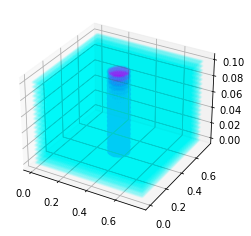

In [57]:
#tensor to store material properties for each point
#0 index is density
#1 index is first Lame Parmaeter
#2 index is second lame parameter

matProps=np.zeros((3,gl1,gw1,gh1))
matProps[0,:,:,:]=rho1
matProps[1,:,:,:]=lmbda1
matProps[2,:,:,:]=mu1


#call one of the functions defined above to create material geoemtry

#rectangular cylinder
#matProps=rectangleCylinder(matProps, length2, width2, height2, gl1,gw2,gh2,gs,rho2,lmbda2,mu2)

#wedge block
#matProps=angledWedge(matProps, length2,width2,height2, gl1,gw1,gs,rho2,lmbda2,mu2)

#circle cylinder with radius cr in meters, and position (locx,locy)
cr=0.09*length1
locx=int(gl1/2)
locy=int(gw1/2)

matProps= circularCylinder(matProps, cr, locx,locy, gl1,gw1,gs,rho2,lmbda2,mu2)

#elliptic cylinder defined by major axes lengths a and b centered at (locx,locy)
#a=length1/4
#b=width1/2
#locx=int(gl1/2)
#locy=int(gw1/2)

#matProps=ellipticCylinder(matProps,a,b,locx,locy,gl1,gw1,gs,rho2,lmbda2,mu2)

#sphere with radius sr centered at (locx,locy,locz)
#sr=length1/4
#locx=int(gl1/2)
#locy=int(gw1/2)
#locz=int(gh1/2)


#matProps=sphere(matProps, sr,locx,locy,locz, gl1,gw1,gh1,gs, rho2,lmbda2,mu2)

    
#plot matProps density values
printMatProps(matProps)


In [58]:
def sinExponentialInput(timeVec,frequency,amp,decayRate, inputx,inputy,inputz,inputRadius, ts,gs,rho1 ):
    #excitation function is equal to A*e(-t)*sin(2*pi*f*t)
    
           
    sinConst=ts*amp/rho1
    
    sinInputSignal=sinConst*np.sin(2*np.pi*frequency*timeVec)*np.exp(-decayRate*timeVec)
    
    
    print('type: sin exponential')
    print('tranducer location (m), grid pts:', [gs*inputx,gs*inputy,gs*inputz], [inputx,inputy,inputz])
    print('excitation radius grid pts:',inputRadius)
    print('frequency=',frequency,'amplitude=',amp,'- decay rate=',decayRate)
    
    return sinInputSignal


timeVec=np.linspace(0,runtime,Tsteps)
amp=1e10
decayRate=3000

inputRadius=int(0.05*gl1)
inputx=int(gl1/2)
inputy=2
inputz=int(gh1/2)


print('---------- EXCITATION FUNCTION ----------')
inputSignal=sinExponentialInput(timeVec,frequency,amp,decayRate,inputx,inputy,inputz,inputRadius, ts,gs,rho1)

#plt.plot(timeVec,inputSignal)

---------- EXCITATION FUNCTION ----------
type: sin exponential
tranducer location (m), grid pts: [0.374, 0.011, 0.049499999999999995] [68, 2, 9]
excitation radius grid pts: 6
frequency= 20000 amplitude= 10000000000.0 - decay rate= 3000


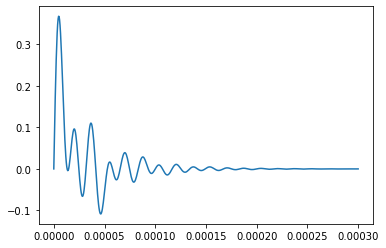

In [59]:
timeVec=np.linspace(0,runtime,Tsteps)
amp=1e10
dr1=35000
f1=35000

szzConst=2*ts/(gs*rho1)
sinConst=ts*amp/rho1
    
s1=sinConst*np.sin(2*np.pi*f1*timeVec)*np.exp(-dr1*timeVec)


dr2=25000
f2=60000
s2=sinConst*np.sin(2*np.pi*f2*timeVec)*np.exp(-dr2*timeVec)

dr3=42500
f3=15000
s3=sinConst*np.sin(2*np.pi*f3*timeVec)*np.exp(-dr3*timeVec)

sinInput=1/3*(s1+s2+s3)

plt.plot(timeVec,sinInput)

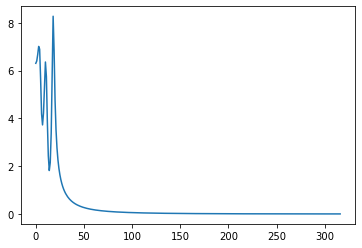

In [60]:
from scipy.fftpack import fft,ifft

N=len(sinInput)

freqs=np.abs(fft(sinInput))
plt.plot(freqs[:int(N/2)])


---------- EXCITATION FUNCTION ----------
tranducer location in meters, grid pts: [0.374, 0.0165, 0.049499999999999995] [68, 3, 9]


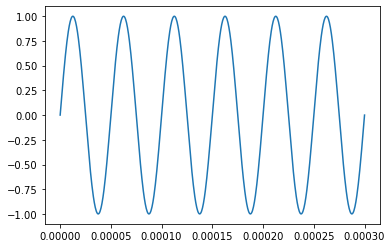

In [61]:
#define sine-exponential wave excitation

print('---------- EXCITATION FUNCTION ----------')

timeVec=np.linspace(0,runtime,Tsteps)

#radius
r=int(0.05*gl1)
inputx=int(gl1/2)
inputy=3
inputz=int(gh1/2)
print('tranducer location in meters, grid pts:', [gs*inputx,gs*inputy,gs*inputz], [inputx,inputy,inputz])


szzConst=2*ts/(gs*rho1)

amp=1e10
decayRate= 1
sinConst=ts*amp/rho1

sinInputSignal=np.sin(2*np.pi*frequency*timeVec)*np.exp(-decayRate*timeVec)

plt.plot(timeVec,sinInputSignal)

plt.ioff()

In [62]:
#record the signal at a specified location
#signalLocx=int(gl1/2)
#signalLocy=10
#signalLocz=int(gh1/2)

vxSignal=np.zeros(Tsteps)
vySignal=np.zeros(Tsteps)
vzSignal=np.zeros(Tsteps)
sxxSignal=np.zeros(Tsteps)
syySignal=np.zeros(Tsteps)
szzSignal=np.zeros(Tsteps)
sxySignal=np.zeros(Tsteps)
sxzSignal=np.zeros(Tsteps)
syzSignal=np.zeros(Tsteps)

#Here, we specify the signal recording location as specified by (r,theta,z) 
#The (x,y,z) position is then calculated from the polar coor. values

r=int(gl1/3)     #radius from center to record signal, should be larger than cylinder radius cr, but less than gl1/2
theta=0          #angle to record signal specified in degrees [0,360] measured clockwise from the bottom of the grid
z=int(gh1/2)     #height of signal, usually at center height

#calculate (x,y,z) from polar coordinates
thetaPolar=np.radians(theta)-np.pi/2
xpolar=int(r*np.cos(thetaPolar))
ypolar=int(r*np.sin(thetaPolar))

#the signal location is the sum of the cylinder center coordinates and calculated polar coordinates
signalLocx=locx+xpolar
signalLocy=locy+ypolar
signalLocz=z

print('----------- SIGNAL RECORDING ----------')

if r>=np.floor(cr/gs) and r<gl1/2:
    print('signal radius satifies length conditions')
else:
    print('signal radius is wrong size (cylinder radius, signal radius, gl1/2):',[np.floor(cr/gs),r,int(gl1/2)])

print('grid dimensions:',[gl1,gw1,gh1])
print('Siganl being recorded at:',[r,np.degrees(theta),z])
print('signal location in grid pts:', [signalLocx,signalLocy,signalLocz])

----------- SIGNAL RECORDING ----------
signal radius satifies length conditions
grid dimensions: [137, 137, 19]
Siganl being recorded at: [45, 0.0, 9]
signal location in grid pts: [68, 23, 9]


In [63]:
#boundary values 
xmax=gl1-1
ymax=gw1-1
zmax=gh1-1

#initialize fields
vx=np.zeros((gl1,gw1,gh1))
vy=np.zeros((gl1,gw1,gh1))
vz=np.zeros((gl1,gw1,gh1))

sxx=np.zeros((gl1,gw1,gh1))
syy=np.zeros((gl1,gw1,gh1))
szz=np.zeros((gl1,gw1,gh1))
sxy=np.zeros((gl1,gw1,gh1))
sxz=np.zeros((gl1,gw1,gh1))
syz=np.zeros((gl1,gw1,gh1))



for t in range(0,Tsteps):
    
       
    #sin-exponential input
    #vz[inputx-r:inputx+r,inputy-r:inputy+r,inputz]=vz[inputx-r:inputx+r,inputy-r:inputy+r,inputz]-szzConst*szz[inputx-r:inputx+r,inputy-r:inputy+r,inputz]+sinConst*sinInputSignal[t]
    
    #sin-exponential input as plane wave from yz face
    vz[:,inputy,inputz]=vz[:,inputy,inputz]-szzConst*szz[:,inputy,inputz]+sinInputSignal[t]
    
    
    
    #update Stresses
    for x in range(gl1):
        for y in range(gw1):
            for z in range(gh1):
                
                #Calculate constants for stress equations
                norm1=(1/gs)*(matProps[1,x,y,z]+2*matProps[2,x,y,z])
                norm2=(1/gs)*(matProps[1,x,y,z])
                
                
                if x!=0 and x!=xmax and y!=0 and y!=ymax:
                    shearDenomxy=(1/matProps[2,x,y,z])+(1/matProps[2,x+1,y,z])+(1/matProps[2,x,y+1,z])+(1/matProps[2,x+1,y+1,z])
                    shearxy=4*(1/gs)*(1/shearDenomxy)
                    
                if x!=0 and x!=xmax and z!=0 and z!=zmax:
                    
                    shearDenomxz=(1/matProps[2,x,y,z])+(1/matProps[2,x+1,y,z])+(1/matProps[2,x,y,z+1])+(1/matProps[2,x+1,y,z+1])
                    shearxz=4*(1/gs)*(1/shearDenomxz)
                
                if y!=0 and y!=ymax and z!=0 and z!=zmax:
                    
                    shearDenomyz=(1/matProps[2,x,y,z])+(1/matProps[2,x,y+1,z])+(1/matProps[2,x,y,z+1])+(1/matProps[2,x,y+1,z+1])
                    shearyz=4*(1/gs)*(1/shearDenomyz)
                
                
                 #NORMAL UPDATE
                if x!=0 and x!=xmax and y!=0 and y!=ymax and z!=0 and z!=zmax:
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    ds=shearxy*(vx[x,y+1,z]-vx[x,y,z]+vy[x+1,y,z]-vy[x,y,z])
                    sxy[x,y,z]=sxy[x,y,z]+ds*ts

                    ds=shearxz*(vx[x,y,z+1]-vx[x,y,z]+vz[x+1,y,z]-vz[x,y,z])
                    sxz[x,y,z]=sxz[x,y,z]+ds*ts   
                
                    ds=shearyz*(vy[x,y,z+1]-vy[x,y,z]+vz[x,y+1,z]-vz[x,y,z])
                    syz[x,y,z]=syz[x,y,z]+ds*ts

                
                #FACES
                elif x!=0 and x!=xmax and y!=0 and y!=ymax and z==0:
                    
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    ds=shearxy*(vx[x,y+1,z]-vx[x,y,z]+vy[x+1,y,z]-vy[x,y,z])
                    sxy[x,y,z]=sxy[x,y,z]+ds*ts
                    del shearxy
                    
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                                        
                elif x==0 and y!=0 and y!=ymax and z!=0 and z!=zmax:
                    
                    
                    sxx[x,y,x]=-sxx[x+1,y,z]
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    
                    ds=shearyz*(vy[x,y,z+1]-vy[x,y,z]+vz[x,y+1,z]-vz[x,y,z])
                    syz[x,y,z]=syz[x,y,z]+ds*ts
                    del shearyz
                    
                    
                    
                elif x==xmax and y!=0 and y!=ymax and z!=0 and z!=zmax:
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    
                    ds=shearyz*(vy[x,y,z+1]-vy[x,y,z]+vz[x,y+1,z]-vz[x,y,z])
                    syz[x,y,z]=syz[x,y,z]+ds*ts
                    del shearyz
                    
                elif x!=0 and x!=xmax and y==0 and z!=0 and z!=zmax:
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    
                    ds=shearxz*(vx[x,y,z+1]-vx[x,y,z]+vz[x+1,y,z]-vz[x,y,z])
                    sxz[x,y,z]=sxz[x,y,z]+ds*ts
                    del shearxz
                    
                    syz[x,y,z]=0
                    
                elif x!=0 and x!=xmax and y==ymax and z!=0 and z!=zmax:
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    
                    ds=shearxz*(vx[x,y,z+1]-vx[x,y,z]+vz[x+1,y,z]-vz[x,y,z])
                    sxz[x,y,z]=sxz[x,y,z]+ds*ts
                    del shearxz
                    
                    syz[x,y,z]=0
                    
                elif x!=0 and x!=xmax and y!=0 and y!=ymax and z==zmax:
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    ds=shearxy*(vx[x,y+1,z]-vx[x,y,z]+vy[x+1,y,z]-vy[x,y,z])
                    sxy[x,y,z]=sxy[x,y,z]+ds*ts
                    del shearxy
                    
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                #EDGES
                #bottom edges
                elif x==0 and y!=0 and y!=ymax and z==0:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==xmax and y!=0 and y!=ymax and z==0:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    szz[x,y,z]-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                elif x!=0 and x!=xmax and y==0 and z==0:
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                elif x!=0 and x!=xmax and y==ymax and z==0:
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                #side edges
                elif x==0 and y==0 and z!=0 and z!=zmax:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                elif x==xmax and y==0 and z!=0 and z!=zmax:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==0 and y==ymax and z!=0 and z!=zmax:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                elif x==xmax and y==ymax and z!=0 and z!=zmax:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    ds=norm1*(vz[x,y,z]-vz[x,y,z-1])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vy[x,y,z]-vy[x,y-1,z])
                    szz[x,y,z]=szz[x,y,z]+ds*ts
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                #top edges
                elif x==0 and y!=0 and y!=ymax and z==zmax:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==xmax and y!=0 and y!=ymax and z==zmax:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    ds=norm1*(vy[x,y,z]-vy[x,y-1,z])+norm2*(vx[x,y,z]-vx[x-1,y,z]+vz[x,y,z]-vz[x,y,z-1])
                    syy[x,y,z]=syy[x,y,z]+ds*ts
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x!=0 and x!=xmax and y==0 and z==zmax:
                    
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                elif x!=0 and x!=xmax and y==ymax and z==zmax:
                    
                    
                    ds=norm1*(vx[x,y,z]-vx[x-1,y,z])+norm2*(vy[x,y,z]-vy[x,y-1,z]+vz[x,y,z]-vz[x,y,z-1])
                    sxx[x,y,z]=sxx[x,y,z]+ds*ts
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                    
                #CORNERS
                
                elif x==0 and y==0 and z==0:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==0 and y==0 and z==zmax:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==0 and y==ymax and z==0:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==0 and y==ymax and z==zmax:
                    
                    sxx[x,y,z]=-sxx[x+1,y,z]
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==xmax and y==0 and z==0:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==xmax and y==0 and z==zmax:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    syy[x,y,z]=-syy[x,y+1,z]
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==xmax and y==ymax and z==0:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    szz[x,y,z]=-szz[x,y,z+1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                elif x==xmax and y==ymax and z==zmax:
                    
                    sxx[x,y,z]=-sxx[x-1,y,z]
                    
                    syy[x,y,z]=-syy[x,y-1,z]
                    
                    szz[x,y,z]=-szz[x,y,z-1]
                    
                    sxy[x,y,z]=0
                    sxz[x,y,z]=0
                    syz[x,y,z]=0
                    
                

                #delete variables for updates
                del norm1, norm2
                
                
    
    #update Velocities
    for x in range(gl1):
        for y in range(gw1):
            for z in range(gh1):
                
                #calculate constants for velocity
                if x!=xmax:
                    dvxConst=2*(1/gs)*(1/(matProps[0,x,y,z]+matProps[0,x+1,y,z]))
                    vminx=(2*ts)/(matProps[0,x+1,y,z]*gs)

                if y!=ymax:
                    dvyConst=2*(1/gs)*(1/(matProps[0,x,y,z]+matProps[0,x,y+1,z]))
                    vminy=(2*ts)/(matProps[0,x,y+1,z]*gs)

                if z!=zmax:
                    dvzConst=2*(1/gs)*(1/(matProps[0,x,y,z]+matProps[0,x,y,z+1]))
                    vminz=(2*ts)/(matProps[0,x,y,z+1]*gs)
                
                
                
                vmax=(2*ts)/(matProps[0,x,y,z]*gs)

                
                if x!=0 and x!=xmax and y!=0 and y!=ymax and z!=0 and z!=zmax:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts
            
                    del dvxConst, dvyConst, dvzConst
                
                
                #FACES
                elif x!=0 and x!=xmax and y!=0 and y!=ymax and z==0:
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                    
                elif x==0 and y!=0 and y!=ymax and z!=0 and z!=zmax:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts

                    
                elif x==xmax and y!=0 and y!=ymax and z!=0 and z!=zmax:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts
                    
                elif x!=0 and x!=xmax and y==0 and z!=0 and z!=zmax:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts
                    
                   
                elif x!=0 and x!=xmax and y==ymax and z!=0 and z!=zmax:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts                     
                    
                    
                elif x!=0 and x!=xmax and y!=0 and y!=ymax and z==zmax:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]

                    
                    
                #EDGES
                #bottom edges
                elif x==0 and y!=0 and y!=ymax and z==0:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                   
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x==xmax and y!=0 and y!=ymax and z==0:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x!=0 and x!=xmax and y==0 and z==0:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x!=0 and x!=xmax and y==ymax and z==0:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                #side edges
                elif x==0 and y==0 and z!=0 and z!=zmax:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts

                elif x==xmax and y==0 and z!=0 and z!=zmax:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts
                    
                    
                elif x==0 and y==ymax and z!=0 and z!=zmax:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    
                                  
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts
                    
                    
                    
                elif x==xmax and y==ymax and z!=0 and z!=zmax:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    
                    dv=dvzConst*(sxz[x,y,z]-sxz[x-1,y,z]+syz[x,y,z]-syz[x,y-1,z]+szz[x,y,z+1]-szz[x,y,z])
                    vz[x,y,z]=vz[x,y,z]+dv*ts
                    
                                        
                #top edges
                elif x==0 and y!=0 and y!=ymax and z==zmax:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                    
                elif x==xmax and y!=0 and y!=ymax and z==zmax:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    
                    dv=dvyConst*(sxy[x,y,z]-sxy[x-1,y,z]+syy[x,y+1,z]-syy[x,y,z]+syz[x,y,z]-syz[x,y,z-1])
                    vy[x,y,z]=vy[x,y,z]+dv*ts
                    
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                elif x!=0 and x!=xmax and y==0 and z==zmax:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                    
                elif x!=0 and x!=xmax and y==ymax and z==zmax:
                    
                    dv=dvxConst*(sxx[x+1,y,z]-sxx[x,y,z]+sxy[x,y,z]-sxy[x,y-1,z]+sxz[x,y,z]-sxz[x,y,z-1])
                    vx[x,y,z]=vx[x,y,z]+dv*ts
                    
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                 
                #CORNERS
                elif x==0 and y==0 and z==0:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x==0 and y==0 and z==zmax:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                elif x==0 and y==ymax and z==0:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x==0 and y==ymax and z==zmax:
                    
                    vx[x,y,z]=vx[x,y,z]+vminx*sxx[x+1,y,z]
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                elif x==xmax and y==0 and z==0:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x==xmax and y==0 and z==zmax:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    vy[x,y,z]=vy[x,y,z]+vminy*syy[x,y+1,z]
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                elif x==xmax and y==ymax and z==0:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    vz[x,y,z]=vz[x,y,z]+vminz*szz[x,y,z+1]
                    
                elif x==xmax and y==ymax and z==zmax:
                    
                    vx[x,y,z]=vx[x,y,z]-vmax*sxx[x,y,z]
                    vy[x,y,z]=vy[x,y,z]-vmax*syy[x,y,z]
                    vz[x,y,z]=vz[x,y,z]-vmax*szz[x,y,z]
                    
                       
    
    #record signals
    vxSignal[t] = vx[signalLocx,signalLocy,signalLocz]
    vySignal[t] = vy[signalLocx,signalLocy,signalLocz]
    vzSignal[t] = vz[signalLocx,signalLocy,signalLocz]
    
    sxxSignal[t] = sxx[signalLocx,signalLocy,signalLocz]
    syySignal[t] = syy[signalLocx,signalLocy,signalLocz]
    szzSignal[t] = szz[signalLocx,signalLocy,signalLocz]
    sxySignal[t] = sxy[signalLocx,signalLocy,signalLocz]
    sxzSignal[t] = sxz[signalLocx,signalLocy,signalLocz]
    syzSignal[t] = syz[signalLocx,signalLocy,signalLocz]
    
    '''
    #save velocity magnitude figure
    vMag=np.square(vx)+np.square(vy)+np.square(vz)
    vMag=np.sqrt(vMag)
    
    #save velocity cut figure
    if t%10==0 and t<100:
        fig=plt.figure()
        plt.contourf(np.transpose(vMag[:,:,int(gh1/2)]), cmap='coolwarm')
        plt.savefig('savedFigs/EFIT3D/vmagMidcut0'+str(t)+'.png')
        plt.close(fig)
    elif t%10==0 and t>=100:
        fig=plt.figure()
        plt.contourf(np.transpose(vMag[:,:,int(gh1/2)]), cmap='coolwarm')
        plt.savefig('savedFigs/EFIT3D/vmagMidcut'+str(t)+'.png')
        plt.close(fig)
    '''
    
    
    #save velocity cut figure
    if t%10==0 and t<100:
        fig=plt.figure()
        plt.contourf(np.transpose(vz[:,:,int(gh1/2)]), cmap='coolwarm')
        plt.savefig('savedFigs/EFIT3D/vzMidcut0'+str(t)+'.png')
        plt.close(fig)
    elif t%10==0 and t>=100:
        fig=plt.figure()
        plt.contourf(np.transpose(vz[:,:,int(gh1/2)]), cmap='coolwarm')
        plt.savefig('savedFigs/EFIT3D/vzMidcut'+str(t)+'.png')
        plt.close(fig)
    
    
    print(t,'/',Tsteps-1,'checksums vx, sxx:',np.sum(np.absolute(vx))/(gl1*gw1*gh1),np.sum(np.absolute(sxx))/(gl1*gw1*gh1))

0 / 633 checksums vx, sxx: 0.0 0.0
1 / 633 checksums vx, sxx: 5.0766084814481583e-08 112.13457990189532
2 / 633 checksums vx, sxx: 2.3436516832090616e-07 417.063590240114
3 / 633 checksums vx, sxx: 6.335692716874055e-07 944.5119453293958
4 / 633 checksums vx, sxx: 1.3028645640482254e-06 1672.651040151253
5 / 633 checksums vx, sxx: 2.2523537410763444e-06 2545.192622514398
6 / 633 checksums vx, sxx: 3.4495616854179762e-06 3497.988650473107
7 / 633 checksums vx, sxx: 4.836316132282109e-06 4483.8427511828
8 / 633 checksums vx, sxx: 6.352198631147132e-06 5486.252329974328
9 / 633 checksums vx, sxx: 7.954822070697077e-06 6521.715127901681
10 / 633 checksums vx, sxx: 9.630261290799897e-06 7619.2718786627165
11 / 633 checksums vx, sxx: 1.1392204335915879e-05 8810.588467024412
12 / 633 checksums vx, sxx: 1.3273026448131979e-05 10124.764269785153
13 / 633 checksums vx, sxx: 1.5312086432402405e-05 11556.121600718992
14 / 633 checksums vx, sxx: 1.756649138246352e-05 13285.530143388876
15 / 633 che

121 / 633 checksums vx, sxx: 0.004348942556055211 625076.0374568161
122 / 633 checksums vx, sxx: 0.0044397093541650124 629739.1385423347
123 / 633 checksums vx, sxx: 0.004531197438250352 633927.3033755966
124 / 633 checksums vx, sxx: 0.004625486990157799 637081.2205850077
125 / 633 checksums vx, sxx: 0.004721740181868542 639190.8838061831
126 / 633 checksums vx, sxx: 0.004820442880785856 640285.0222975031
127 / 633 checksums vx, sxx: 0.00491866716007919 640391.9655223548
128 / 633 checksums vx, sxx: 0.0050173310984785524 639507.2330297311
129 / 633 checksums vx, sxx: 0.005116773289210167 637803.0476528015
130 / 633 checksums vx, sxx: 0.0052155686430774666 636011.418396879
131 / 633 checksums vx, sxx: 0.00531247892705854 634462.5087896409
132 / 633 checksums vx, sxx: 0.0054107431577782765 634599.2484426538
133 / 633 checksums vx, sxx: 0.00551374292851183 635871.7544396699
134 / 633 checksums vx, sxx: 0.005620375375289012 636785.6456875858
135 / 633 checksums vx, sxx: 0.00572674707861875

242 / 633 checksums vx, sxx: 0.04426419933402803 2433699.7269288925
243 / 633 checksums vx, sxx: 0.045124448651639594 2454493.569345384
244 / 633 checksums vx, sxx: 0.046018838102846724 2475070.4569508396
245 / 633 checksums vx, sxx: 0.046956845201179355 2496894.7423365843
246 / 633 checksums vx, sxx: 0.047889521775884174 2524163.596355417
247 / 633 checksums vx, sxx: 0.048785298054959673 2552183.658095493
248 / 633 checksums vx, sxx: 0.049702654840387744 2581904.7099704696
249 / 633 checksums vx, sxx: 0.05062647484018721 2612925.6192066125
250 / 633 checksums vx, sxx: 0.0515668886580448 2643395.480077396
251 / 633 checksums vx, sxx: 0.052554551839544994 2673551.5718332566
252 / 633 checksums vx, sxx: 0.05359805250456137 2703572.1313866638
253 / 633 checksums vx, sxx: 0.054656955425956916 2735216.4580052495
254 / 633 checksums vx, sxx: 0.05572415108697765 2771106.5453395196
255 / 633 checksums vx, sxx: 0.05681351631443748 2809778.9488181737
256 / 633 checksums vx, sxx: 0.05790895582184

365 / 633 checksums vx, sxx: 0.7065714262916267 14912845.165400483
366 / 633 checksums vx, sxx: 0.7239400059482954 15195549.72287342
367 / 633 checksums vx, sxx: 0.7422419788734527 15503278.123132028
368 / 633 checksums vx, sxx: 0.7614319100148964 15820539.1117661
369 / 633 checksums vx, sxx: 0.7806599258765712 16144757.13106856
370 / 633 checksums vx, sxx: 0.8012797896982564 16472119.14088265
371 / 633 checksums vx, sxx: 0.8224225329050074 16795213.84283953
372 / 633 checksums vx, sxx: 0.8437684533745801 17131849.889772397
373 / 633 checksums vx, sxx: 0.8647246450305953 17474375.42055806
374 / 633 checksums vx, sxx: 0.8860659319272265 17825022.158368398
375 / 633 checksums vx, sxx: 0.9084728215726043 18189195.591844745
376 / 633 checksums vx, sxx: 0.93110395044803 18565195.81167394
377 / 633 checksums vx, sxx: 0.9551358905900994 18936024.23294917
378 / 633 checksums vx, sxx: 0.9793068220960102 19305415.600681785
379 / 633 checksums vx, sxx: 1.0047426854705204 19667791.56413169
380 / 6

490 / 633 checksums vx, sxx: 17.91359966948693 230692104.73623234
491 / 633 checksums vx, sxx: 18.42103492995369 236079026.23281053
492 / 633 checksums vx, sxx: 18.907268344236712 241708806.36609927
493 / 633 checksums vx, sxx: 19.416642933651957 247603199.1153022
494 / 633 checksums vx, sxx: 19.936710239096175 253596750.1267619
495 / 633 checksums vx, sxx: 20.470948176381885 260000402.910824
496 / 633 checksums vx, sxx: 21.033493346099018 266344277.50885528
497 / 633 checksums vx, sxx: 21.624959463048956 272541453.9244794
498 / 633 checksums vx, sxx: 22.23103550437722 278958036.1981991
499 / 633 checksums vx, sxx: 22.845388659827105 285617324.1528453
500 / 633 checksums vx, sxx: 23.44832627935563 292751018.8150534
501 / 633 checksums vx, sxx: 24.05048745203742 300248228.6798228
502 / 633 checksums vx, sxx: 24.65004912903773 307964232.37408274
503 / 633 checksums vx, sxx: 25.26240359666773 316081254.58206046
504 / 633 checksums vx, sxx: 25.91283476935881 324286220.2783283
505 / 633 che

615 / 633 checksums vx, sxx: 564.0098494158251 6345713491.111599
616 / 633 checksums vx, sxx: 580.7411213674607 6511900895.862093
617 / 633 checksums vx, sxx: 597.2927023136285 6689096270.97689
618 / 633 checksums vx, sxx: 613.4634082858374 6890388800.127513
619 / 633 checksums vx, sxx: 630.49766842779 7098719914.690581
620 / 633 checksums vx, sxx: 647.3703467841946 7311383411.235189
621 / 633 checksums vx, sxx: 664.4544218724401 7520813704.948642
622 / 633 checksums vx, sxx: 681.0155728783303 7722953668.656646
623 / 633 checksums vx, sxx: 698.7375630568837 7921984273.117813
624 / 633 checksums vx, sxx: 716.769076403708 8120703778.407417
625 / 633 checksums vx, sxx: 734.2680095489508 8342446204.939755
626 / 633 checksums vx, sxx: 751.8504367493902 8573621631.495461
627 / 633 checksums vx, sxx: 770.7992827985195 8812218382.238476
628 / 633 checksums vx, sxx: 789.8723029570265 9056987112.794006
629 / 633 checksums vx, sxx: 808.2434428136017 9305417903.165966
630 / 633 checksums vx, sxx: 

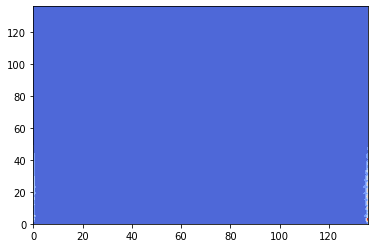

In [64]:
vMag=np.square(vx)+np.square(vy)+np.square(vz)
vMag=np.sqrt(vMag)
plt.contourf(np.transpose(vMag[:,:,gh1-2]), cmap='coolwarm')

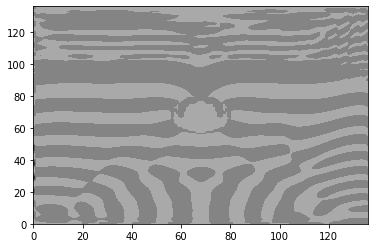

In [65]:
plt.contourf(np.transpose(vz[:,:,int(gh1/2)]), cmap='Greys')

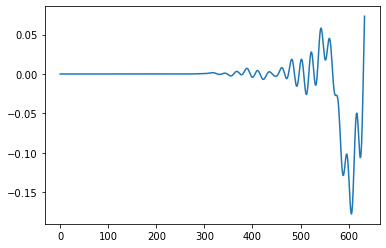

In [68]:
plt.plot(vxSignal)


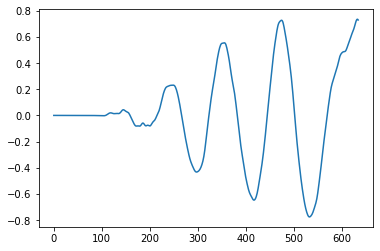

In [67]:
plt.plot(vySignal)

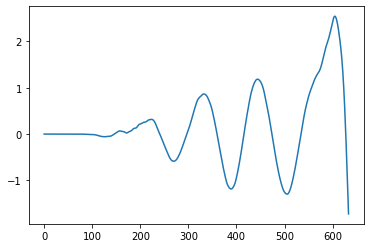

In [69]:
plt.plot(vzSignal)

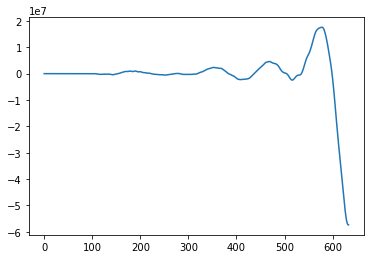

In [70]:
plt.plot(sxxSignal)

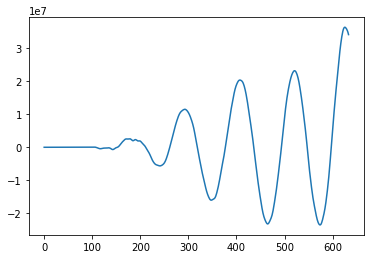

In [71]:
plt.plot(syySignal)

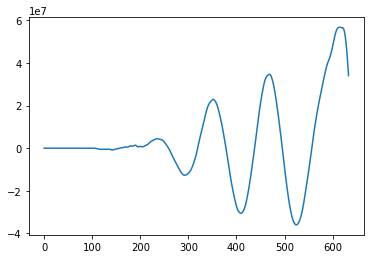

In [72]:
plt.plot(szzSignal)

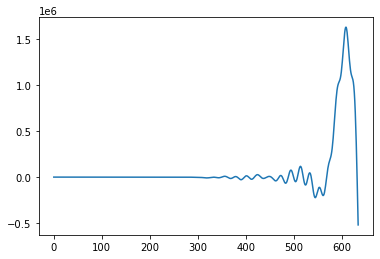

In [73]:
plt.plot(sxySignal)

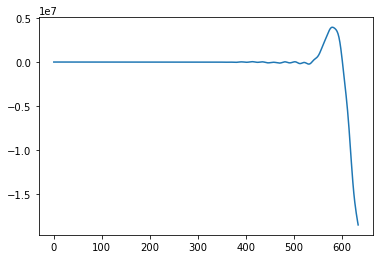

In [74]:
plt.plot(sxzSignal)

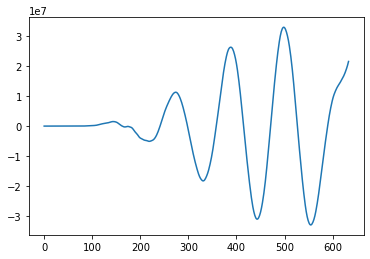

In [75]:
plt.plot(syzSignal)

In [27]:
#save background signals

vx0=vxSignal
vy0=vySignal
vz0=vzSignal

sxx0=sxxSignal
syy0=syySignal
szz0=szzSignal
sxy0=sxySignal
sxz0=sxzSignal
syz0=syzSignal



In [26]:
# make animated gif from saved EFIT figures

import glob
from skimage.color import rgb2gray
from PIL import Image


def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.PNG")]
    frame_one = frames[0]
    frame_one.save(f"{frame_folder}/efitAnim.gif", format="GIF", append_images=frames,
               save_all=True, duration=300, loop=0)
    


In [82]:
frame_folder='savedFigs/EFIT3D'

make_gif(frame_folder)


In [110]:
sr=np.floor(1/ts)

In [111]:
sr*runtime

41.215114285714286

In [116]:
177**2

31329